Importando bibliotecas


In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

Dados Padrões

In [10]:
# Carregando o conjunto de dados Iris
iris = load_iris()
X = iris.data
y = iris.target

# Criando um DataFrame com os dados
df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y

# Tamanho do conjunto de dados
tamanho = df.memory_usage(deep=True).sum() / (1024 * 1024)  # Tamanho em megabytes

# Quantidade de Registros
quantidade_registros = df.shape[0]

# Linhas x Colunas
linhas_colunas = df.shape

# Dados Faltantes
dados_faltantes = df.isnull().sum().sum()

print("Tamanho (MB):", tamanho)
print("Quantidade de Registros:", quantidade_registros)
print("Linhas x Colunas:", linhas_colunas)
print("Dados Faltantes:", dados_faltantes)

Tamanho (MB): 0.005275726318359375
Quantidade de Registros: 150
Linhas x Colunas: (150, 5)
Dados Faltantes: 0


Dividindo o conjunto de dados em treinamento e teste

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Normalizando os recursos

In [4]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Modelos de classificação


In [5]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

Treinando e avaliando os modelos

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



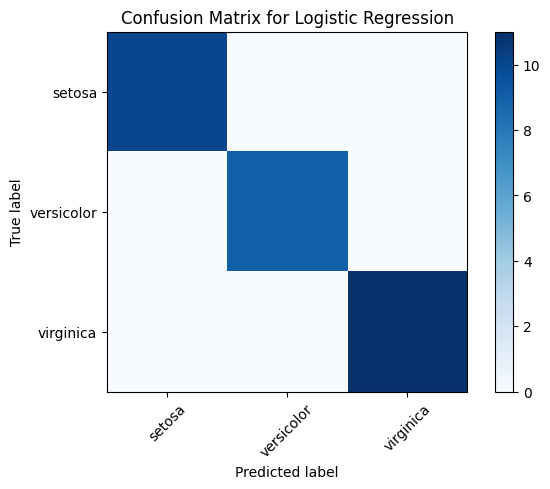

Classification Report for Decision Tree:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



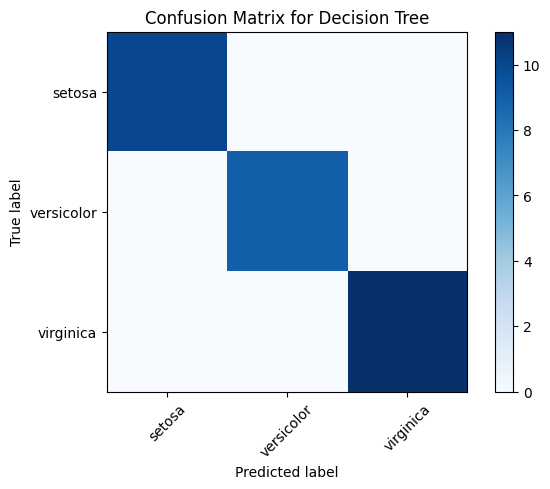

Classification Report for Random Forest:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



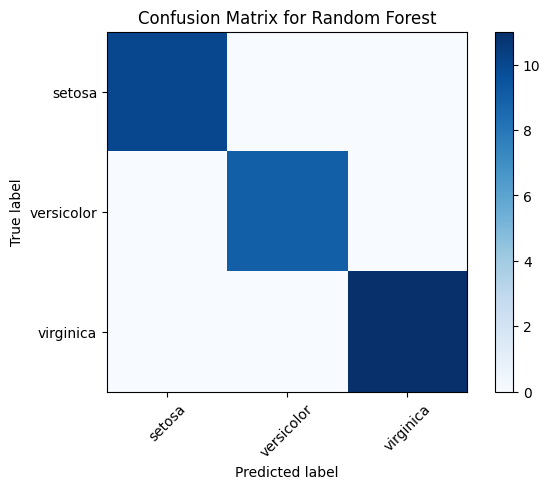

In [6]:
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    report = classification_report(y_test, y_pred, target_names=iris.target_names)
    print(f"Classification Report for {model_name}:\n{report}")
    
    cm = confusion_matrix(y_test, y_pred)
    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix for {model_name}")
    plt.colorbar()
    tick_marks = np.arange(len(iris.target_names))
    plt.xticks(tick_marks, iris.target_names, rotation=45)
    plt.yticks(tick_marks, iris.target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
